# Carga de información geográfica de NTAs
Carga de librerías básicas de manipulación de datos y de datos crudos de la geografía de los NTAs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
geography = pd.read_csv("geographic.csv")

In [3]:
geography.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


# Conversión del archivo de texto a GeoDataFrame

In [4]:
geodf_raw = geography.transpose()

In [5]:
geodf_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301
BK88,-73.976051,40.631284,-73.977167,40.630755,-73.977000,40.629880,-73.976851,40.629097,-73.976697,40.628363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QN52,-73.794934,40.757806,-73.794749,40.755636,-73.794579,40.753571,-73.794629,40.752711,-73.794657,40.751996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QN48,-73.775740,40.743334,-73.775799,40.743326,-73.778060,40.742995,-73.778601,40.742916,-73.779658,40.742738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QN51,-73.803792,40.775618,-73.800991,40.775397,-73.798653,40.775209,-73.798531,40.775199,-73.798234,40.774857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QN27,-73.861099,40.763673,-73.859931,40.762209,-73.859668,40.761910,-73.859137,40.761427,-73.859125,40.761284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(geodf_raw.index)[:5]

['BK88', 'QN52', 'QN48', 'QN51', 'QN27']

El siguiente procedimiento convierte el formato leído a un formato similar al .wkt que lee la librería de gráficos `geopandas` y lo guarda para su posterior uso en caso de no existir

In [7]:
import os.path
if (not(os.path.isfile('gdf.csv'))):

    ntas_names = list(geodf_raw.index)
    polygons = []

    for i in range(len(geodf_raw)):
        string = 'POLYGON (('
        coord = ''
        for j in geodf_raw.columns:
            if (not pd.isna(geodf_raw.iloc[i,j])): 
                if j % 2 == 0:
                    coord = str(geodf_raw.iloc[i,j])
                elif j % 2 == 1:
                    coord = coord + ' ' + str(geodf_raw.iloc[i,j]) + ','
                    string = string + coord
        string = string + str(geodf_raw.iloc[i,0]) + ' ' + str(geodf_raw.iloc[i,1]) + '))'
        polygons.append(string)

    ntas_df = pd.DataFrame({'name':ntas_names, 'geometry':polygons})
    print(ntas_df.head())
    print(type(ntas_df['geometry']))

    ntas_df.to_csv('gdf.csv')
    
else:
    ntas_df = pd.read_csv('gdf.csv')    

# Creación de GeoDataFrame con `geopandas`
Se carga la librería `geopandas` y se convierte la columna geometry a algo raro usando la función `wkt.loads` convierte el DataFrame en un GeoDataFrame

In [8]:
import geopandas
from shapely import wkt
from shapely.geometry import Point, Polygon

In [9]:
ntas_df['geometry']

0      POLYGON ((-73.9760507905698 40.6312841471042, ...
1      POLYGON ((-73.79493384594591 40.7578063026709,...
2      POLYGON ((-73.7757397458527 40.7433339175923, ...
3      POLYGON ((-73.8037916164017 40.7756183875692, ...
4      POLYGON ((-73.86109864852619 40.7636727485249,...
                             ...                        
190    POLYGON ((-73.9380478369022 40.7808378163815, ...
191    POLYGON ((-73.9350544306231 40.7916954772443, ...
192    POLYGON ((-74.010929861053 40.684499723222, -7...
193    POLYGON ((-73.8587260603544 40.7357169097371, ...
194    POLYGON ((-73.8679110448243 40.7449419841195, ...
Name: geometry, Length: 195, dtype: object

Conversión a GeoDataFrame

In [10]:
ntas_df['geometry'] = ntas_df['geometry'].apply(wkt.loads) # Esta línea es mágica (string a POLYGON?)
gdf = geopandas.GeoDataFrame(ntas_df, geometry='geometry')

In [11]:
print(gdf.head())

   Unnamed: 0  name                                           geometry
0           0  BK88  POLYGON ((-73.9760507905698 40.6312841471042, ...
1           1  QN52  POLYGON ((-73.79493384594591 40.7578063026709,...
2           2  QN48  POLYGON ((-73.7757397458527 40.7433339175923, ...
3           3  QN51  POLYGON ((-73.8037916164017 40.7756183875692, ...
4           4  QN27  POLYGON ((-73.86109864852619 40.7636727485249,...


Grafica el GeoDataFrame

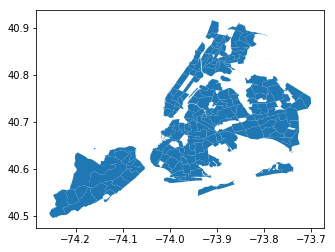

In [12]:
gdf.plot();

## Algunas pruebas con puntos

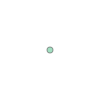

In [13]:
punto = Point(-73.990,40.635)
punto

In [14]:
arr_puntos = [punto.within(gdf['geometry'][i]) for i in range(len(gdf))]
gdf['name'][arr_puntos]

0    BK88
Name: name, dtype: object

In [15]:
list(gdf.loc[arr_puntos, 'name'])

['BK88']

Función a la que le entra un punto y retorna un arreglo con los NTAs asociados (no óptimo)

In [16]:
def point_to_NTA(point):
    arr_puntos = [point.within(gdf['geometry'][i]) for i in range(len(gdf))]
    return(list(gdf.loc[arr_puntos, 'name']))

In [17]:
point_to_NTA(punto)

['BK88']

# Lectura de Uber2014

In [18]:
trips_2014 = pd.read_csv('uber_trips_2014.csv.gz')

In [19]:
trips_2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


In [20]:
geo_trips_2014 = trips_2014.copy()

# Conversión de `pickup_longitude` y `pickup_latitude` a Point

In [21]:
geo_trips_2014["geometry"] = geo_trips_2014.apply(lambda row: Point(row["pickup_longitude"], row["pickup_latitude"]), axis=1)
type(geo_trips_2014)

pandas.core.frame.DataFrame

In [22]:
geo_trips_2014

,pickup_datetime,pickup_latitude,pickup_longitude,base,geometry
0,4/1/14 0:11,40.7690,-73.9549,B02512,POINT (-73.95489999999999 40.769)
1,4/1/14 0:17,40.7267,-74.0345,B02512,POINT (-74.03449999999999 40.7267)
2,4/1/14 0:21,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316)
3,4/1/14 0:28,40.7588,-73.9776,B02512,POINT (-73.9776 40.7588)
4,4/1/14 0:33,40.7594,-73.9722,B02512,POINT (-73.9722 40.7594)
...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,POINT (-73.9845 40.7668)
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,POINT (-74.1773 40.6911)
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,POINT (-73.9319 40.8519)
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,POINT (-74.00660000000001 40.7081)


In [23]:
geo_trips_2014_ready = geopandas.GeoDataFrame(geo_trips_2014, geometry='geometry')
type(geo_trips_2014_ready)

geopandas.geodataframe.GeoDataFrame

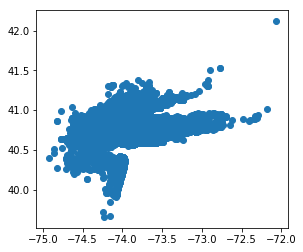

In [24]:
# geo_trips_2014_ready.plot();

# Cruce de Uber 2014 con Geographic

In [25]:
points = geo_trips_2014_ready
polys = gdf
pointInPoly = geopandas.sjoin(points, polys, op='within')

In [26]:
pointInPoly.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,geometry,index_right,Unnamed: 0,name
2,4/1/14 0:21,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316),150,150,MN22
10,4/1/14 1:19,40.7256,-73.9869,B02512,POINT (-73.98690000000001 40.7256),150,150,MN22
12,4/1/14 1:49,40.7271,-73.9803,B02512,POINT (-73.9803 40.7271),150,150,MN22
23,4/1/14 4:19,40.7250,-73.9844,B02512,POINT (-73.98439999999999 40.725),150,150,MN22
75,4/1/14 6:32,40.7322,-73.9863,B02512,POINT (-73.9863 40.7322),150,150,MN22


In [27]:
pointInPoly.to_csv('geo_trips_2014.csv')

In [39]:
uber_2014_left = pointInPoly.drop(['index_right', 'Unnamed: 0'], axis=1)
uber_2014_left = uber_2014_left.reset_index(drop=True)
uber_2014_left.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,geometry,name
2,4/1/14 0:21,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316),MN22
10,4/1/14 1:19,40.7256,-73.9869,B02512,POINT (-73.98690000000001 40.7256),MN22
12,4/1/14 1:49,40.7271,-73.9803,B02512,POINT (-73.9803 40.7271),MN22
23,4/1/14 4:19,40.7250,-73.9844,B02512,POINT (-73.98439999999999 40.725),MN22
75,4/1/14 6:32,40.7322,-73.9863,B02512,POINT (-73.9863 40.7322),MN22


In [54]:
gdf.name

0      BK88
1      QN52
2      QN48
3      QN51
4      QN27
       ... 
190    MN32
191    MN33
192    MN99
193    QN18
194    QN29
Name: name, Length: 195, dtype: object

In [56]:
uber_2014_left.name

0          MN22
1          MN22
2          MN22
3          MN22
4          MN22
           ... 
3782543    MN25
3782544    MN25
3782545    SI11
3782546    SI11
3782547    SI11
Name: name, Length: 3782548, dtype: object

In [64]:
uber2014_geographic = uber_2014_left.join(gdf.set_index('name'), on='name', rsuffix='_NTA').drop('Unnamed: 0', axis = 1)
uber2014_geographic.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,geometry,name,geometry_NTA
0,4/1/14 0:21,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316),MN22,"POLYGON ((-73.9825577344437 40.7313583954125, ..."
1,4/1/14 1:19,40.7256,-73.9869,B02512,POINT (-73.98690000000001 40.7256),MN22,"POLYGON ((-73.9825577344437 40.7313583954125, ..."
2,4/1/14 1:49,40.7271,-73.9803,B02512,POINT (-73.9803 40.7271),MN22,"POLYGON ((-73.9825577344437 40.7313583954125, ..."
3,4/1/14 4:19,40.7250,-73.9844,B02512,POINT (-73.98439999999999 40.725),MN22,"POLYGON ((-73.9825577344437 40.7313583954125, ..."
4,4/1/14 6:32,40.7322,-73.9863,B02512,POINT (-73.9863 40.7322),MN22,"POLYGON ((-73.9825577344437 40.7313583954125, ..."


In [ ]:
uber2014_geographic.to_csv('uber2014_geographic.csv')

In [28]:
len(pointInPoly)

3782548

In [29]:
len(trips_2014)

4534327

In [30]:
1 - len(pointInPoly)/len(trips_2014)

0.16579726164434105

# Graficando mapa y puntos

In [31]:
import matplotlib.pyplot as plt

Sample de trips para no pintar los 4 millones

In [32]:
geo_trips_2014_ready.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,geometry
0,4/1/14 0:11,40.7690,-73.9549,B02512,POINT (-73.95489999999999 40.769)
1,4/1/14 0:17,40.7267,-74.0345,B02512,POINT (-74.03449999999999 40.7267)
2,4/1/14 0:21,40.7316,-73.9873,B02512,POINT (-73.9873 40.7316)
3,4/1/14 0:28,40.7588,-73.9776,B02512,POINT (-73.9776 40.7588)
4,4/1/14 0:33,40.7594,-73.9722,B02512,POINT (-73.9722 40.7594)


In [33]:
geo_trips_2014_ready_sample = geo_trips_2014_ready.sample(n=50)

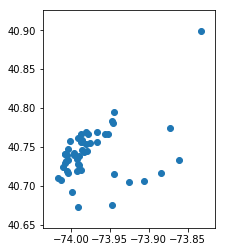

In [35]:
geo_trips_2014_ready_sample.plot();

En esta parte del código la idea es que se puedan pintar los puntos y las zonas

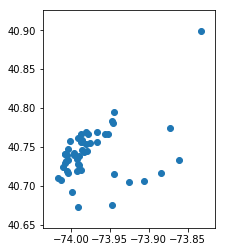

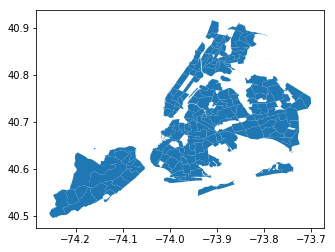

In [37]:
geo_trips_2014_ready_sample.plot()
gdf.plot();